<a href="https://colab.research.google.com/github/h-a-r-l-e-e-n/Fake-News-Detection/blob/main/Fake_News_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import io
import re
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns



In [ ]:
import nltk
nltk.download('stopwords')
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


DATA PREPROCESSING

In [ ]:
news_df=pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
news_df.head()
#in labels 1 represents fake news and 0 represents real news

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
news_df.head(10)

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid even see comey letter jason chaff...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillari clinton big woman campu breitbart
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,civilian kill singl us airstrik identifi
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jail fiction unpublish stori wom...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,jacki mason hollywood would love trump bomb no...
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,life life luxuri elton john favorit shark pict...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,beno hamon win french socialist parti presiden...
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,excerpt draft script donald trump q ampa black...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,back channel plan ukrain russia courtesi trump...


In [ ]:
news_df.shape

(20800, 5)

In [ ]:
news_df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
#replacing the null values with empty strings
news_df=news_df.fillna('')

In [ ]:

news_df['content']=news_df['title']

In [ ]:
X=news_df.drop(columns='label',axis=1)
Y=news_df['label']


STEMMING

In [ ]:
stemmed=PorterStemmer()

In [ ]:
def stemming(content):
  stemmedCont=re.sub('[^a-zA-Z]',' ',content)
  stemmedCont=stemmedCont.lower()
  stemmedCont=stemmedCont.split()
  stemmedCont=[stemmed.stem(word) for word in stemmedCont if not word in stopwords.words('english')]
  stemmedCont=' '.join(stemmedCont)
  return stemmedCont

In [ ]:
news_df['content']=news_df['content'].apply(stemming)

In [ ]:
#sepersting data and labels
X=news_df['content'].values
Y=news_df['label'].values

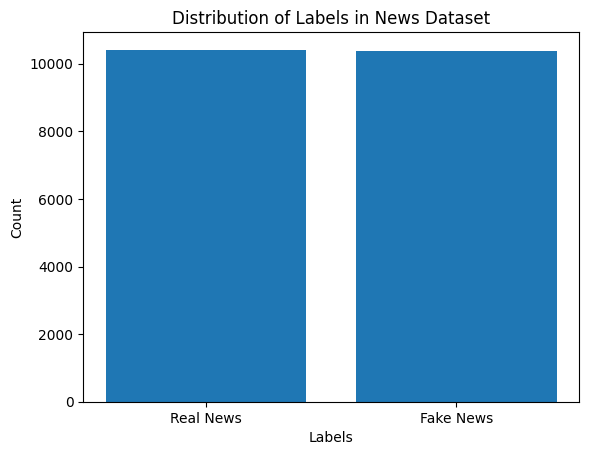

In [ ]:
import matplotlib.pyplot as plt
labels = ['Real News', 'Fake News']
counts = news_df['label'].value_counts()

# Plotting the bar chart
plt.bar(labels, counts.values)

plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels in News Dataset')


plt.show()

In [ ]:
vec=TfidfVectorizer()#gives a numeric statistic how important a word is based on its frequency
vec.fit(X)
X=vec.transform(X)

In [ ]:
print(X)

  (0, 13610)	0.3204429041871619
  (0, 11663)	0.28865071055944214
  (0, 7472)	0.3286263634991149
  (0, 6751)	0.37807503658407626
  (0, 6143)	0.24709678286281997
  (0, 4394)	0.2624700707018907
  (0, 3340)	0.3043365499413147
  (0, 2578)	0.2776884546129286
  (0, 2165)	0.4135903166037093
  (0, 243)	0.3038505731698672
  (1, 14597)	0.4029069338022535
  (1, 5974)	0.255243301322185
  (1, 4874)	0.49350006801559954
  (1, 2444)	0.25583271340004526
  (1, 1946)	0.5127916215485694
  (1, 1650)	0.21311459271319796
  (1, 1313)	0.3938922297906677
  (2, 13543)	0.520272613528009
  (2, 8285)	0.5879029381082882
  (2, 5278)	0.41416349493213955
  (2, 4770)	0.460603020443823
  (3, 13947)	0.2910988442735044
  (3, 12016)	0.4595551330231538
  (3, 7080)	0.3129596268768328
  (3, 6271)	0.48520717569885846
  :	:
  (20796, 14760)	0.12072790494289075
  (20796, 13246)	0.11914995894745603
  (20796, 11529)	0.4694159922014375
  (20796, 9959)	0.4804399319541416
  (20796, 9158)	0.4804399319541416
  (20796, 8881)	0.11669800295

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

TRAINING THE MODEL:LOGISTIC REGRESSION

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#EVALUATION of logistic regression model
#ACCURACY SCORE:
X_trainPRED=model.predict(X_train)
training_Accuracy=accuracy_score(X_trainPRED,Y_train)

In [ ]:
print("Accuracy score of TRAINING data= ",training_Accuracy)

Accuracy score of TRAINING data=  0.9400240384615385


In [ ]:
#Checking accuracy on TEST data
X_testPRED=model.predict(X_test)
LogREG_testing_Accuracy=accuracy_score(X_testPRED,Y_test)

In [ ]:
print("Accuracy score of TESTING data= ",LogREG_testing_Accuracy)

Accuracy score of TESTING data=  0.9298076923076923


In [ ]:
LGprecision = precision_score(Y_test, X_testPRED, average='binary')
print(f"Precision: {LGprecision}")


Precision: 0.8854928971157985


In [ ]:
LGrecall = recall_score(Y_test, X_testPRED, average='binary')
print(LGrecall)

0.9875180028804609


In [ ]:
LGf1 = f1_score(Y_test, X_testPRED, average='binary')
print(f"F1 Score: {LGf1}")

F1 Score: 0.9337267362687245


In [ ]:
print(classification_report(Y_test,X_testPRED))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      2077
           1       0.89      0.99      0.93      2083

    accuracy                           0.93      4160
   macro avg       0.94      0.93      0.93      4160
weighted avg       0.94      0.93      0.93      4160



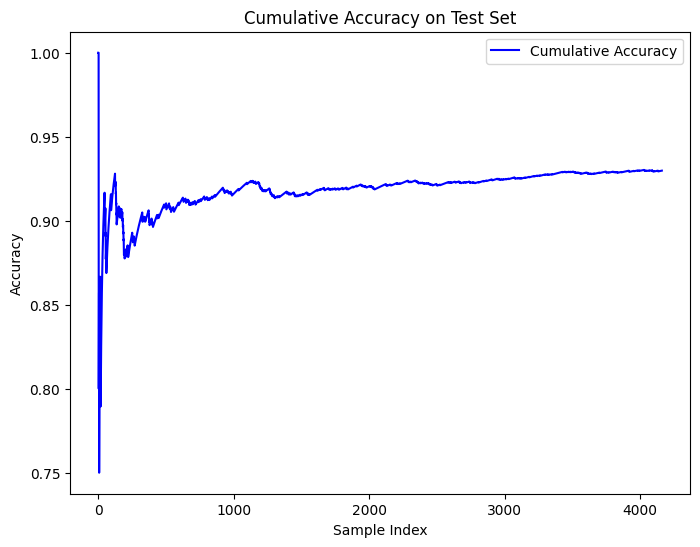

In [ ]:
_testPRED=model.predict(X_test)
testing_Accuracy=accuracy_score(X_testPRED,Y_test)
accuracy_per_sample = [1 if y_true == y_pred else 0 for y_true, y_pred in zip(Y_test, X_testPRED)]
# Calculate cumulative accuracy
cumulative_accuracy = np.cumsum(accuracy_per_sample) / np.arange(1, len(Y_test) + 1)
plt.figure(figsize=(8, 6))
# Line plot
plt.plot(np.arange(len(Y_test)), cumulative_accuracy, label='Cumulative Accuracy', color='blue')
plt.title('Cumulative Accuracy on Test Set')
plt.xlabel('Sample Index')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#MAKING A PREDICTIVE SYSTEM
i=int(input("enter index "))
X_new=X_test[i]
pred=model.predict(X_new)
if(pred[0]==0):
  print("NEWS IS REAL")
else:
  print("NEWS IS FAKE")

print(Y_test[i])

enter index 1
NEWS IS REAL
0


DECESION TREE MODEL


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
#Checking accuracy on TEST data
DT_testPRED=DT.predict(X_test)
DTtesting_Accuracy=accuracy_score(DT_testPRED,Y_test)
print("Accuracy score of TESTING data= ",DTtesting_Accuracy)

Accuracy score of TESTING data=  0.9165865384615385


In [ ]:
DTprecision = precision_score(Y_test,DT_testPRED , average='binary')
print(f"Precision: {DTprecision}")

Precision: 0.9082784571966134


In [ ]:
DTrecall = recall_score(Y_test, DT_testPRED, average='binary')
print(DTrecall)

0.9270283245319251


In [ ]:
DTf1 = f1_score(Y_test, DT_testPRED, average='binary')
print(f"F1 Score: {DTf1}")

F1 Score: 0.9175576146353053


In [ ]:
print(classification_report(Y_test,DT_testPRED))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2077
           1       0.91      0.93      0.92      2083

    accuracy                           0.92      4160
   macro avg       0.92      0.92      0.92      4160
weighted avg       0.92      0.92      0.92      4160



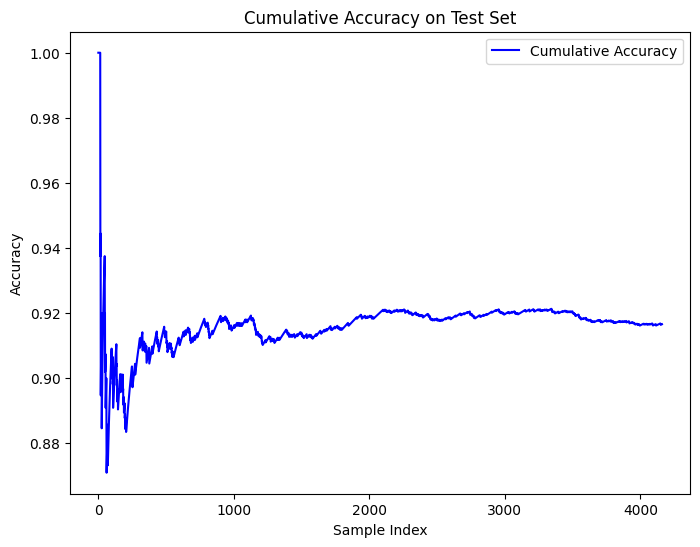

In [ ]:


DT_testPRED=DT.predict(X_test)
DTtesting_Accuracy=accuracy_score(DT_testPRED,Y_test)
accuracy_per_sample = [1 if y_true == y_pred else 0 for y_true, y_pred in zip(Y_test, DT_testPRED)]
# Calculate cumulative accuracy
cumulative_accuracy = np.cumsum(accuracy_per_sample) / np.arange(1, len(Y_test) + 1)
plt.figure(figsize=(8, 6))
# Line plot
plt.plot(np.arange(len(Y_test)), cumulative_accuracy, label='Cumulative Accuracy', color='blue')
plt.title('Cumulative Accuracy on Test Set')
plt.xlabel('Sample Index')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




In [ ]:
#MAKING A PREDICTIVE SYSTEM
i=int(input("enter index "))
DT_X_new=X_test[0]
DTpred=DT.predict(DT_X_new)
if(DTpred[0]==0):
  print("NEWS IS REAL")
else:
  print("NEWS IS FAKE")

print(Y_test[i])

enter index 1
NEWS IS FAKE
0


GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(random_state=0)
GB.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
#EVALUATION of Gradient Boosting Classifier  model
#ACCURACY SCORE of training data:
GB_trainPRED=GB.predict(X_train)
GBtraining_Accuracy=accuracy_score(GB_trainPRED,Y_train)
print("Accuracy score of TRAINING data= ",GBtraining_Accuracy)

Accuracy score of TRAINING data=  0.9234375


In [ ]:
#Checking accuracy on TEST data
GB_testPRED=DT.predict(X_test)
GBtesting_Accuracy=accuracy_score(GB_testPRED,Y_test)
print("Accuracy score of TESTING data= ",GBtesting_Accuracy)

Accuracy score of TESTING data=  0.9165865384615385


In [ ]:
GBprecision = precision_score(Y_test, GB_testPRED, average='binary')
print(f"Precision: {GBprecision}")


Precision: 0.9082784571966134


In [ ]:
GBrecall = recall_score(Y_test, GB_testPRED, average='binary')
print(GBrecall)

0.9270283245319251


In [ ]:
GBf1 = f1_score(Y_test, GB_testPRED, average='binary')
print(f"F1 Score: {GBf1}")

F1 Score: 0.9175576146353053


In [ ]:
print(classification_report(Y_test,GB_testPRED))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2077
           1       0.91      0.93      0.92      2083

    accuracy                           0.92      4160
   macro avg       0.92      0.92      0.92      4160
weighted avg       0.92      0.92      0.92      4160



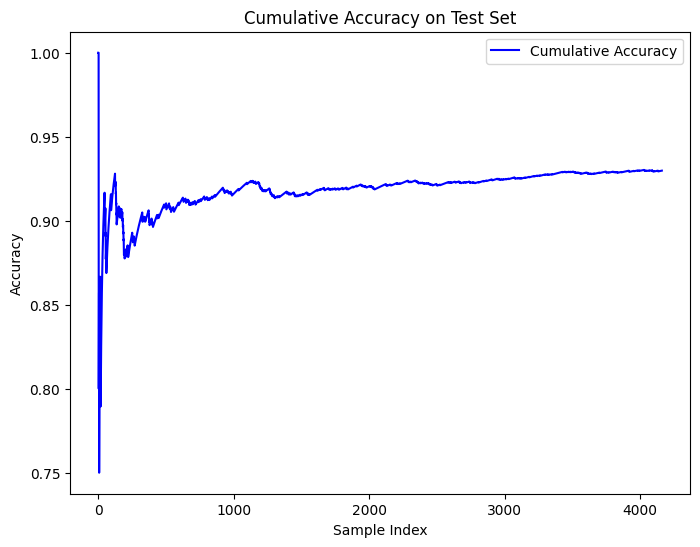

In [ ]:


Y_test_pred = model.predict(X_test)
accuracy_per_sample = [1 if y_true == y_pred else 0 for y_true, y_pred in zip(Y_test, Y_test_pred)]
cumulative_accuracy = np.cumsum(accuracy_per_sample) / np.arange(1, len(Y_test) + 1)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(Y_test)), cumulative_accuracy, label='Cumulative Accuracy', color='blue')

plt.title('Cumulative Accuracy on Test Set')
plt.xlabel('Sample Index')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
#MAKING A PREDICTIVE SYSTEM

GB_X_new=X_test[0]
GBpred=GB.predict(GB_X_new)
if(GBpred[0]==0):
  print("NEWS IS REAL")
else:
  print("NEWS IS FAKE")

print(Y_test[0])

NEWS IS FAKE
1


In [ ]:
#calculate overall accuracy
overall_accuracy=(LogREG_testing_Accuracy+DTtesting_Accuracy+GBtesting_Accuracy)/3
print(overall_accuracy)

0.9209935897435898


In [ ]:
overall_precesion=(LGprecision+DTprecision+GBprecision)/3;
print(overall_precesion)

0.9006832705030083


In [ ]:
overall_recall=(LGrecall+DTrecall+GBrecall)/3;
print(overall_recall)

0.9471915506481037


In [ ]:
overall_f1=(LGf1+DTf1+GBf1)/3
print(overall_f1)

0.9229473218464449


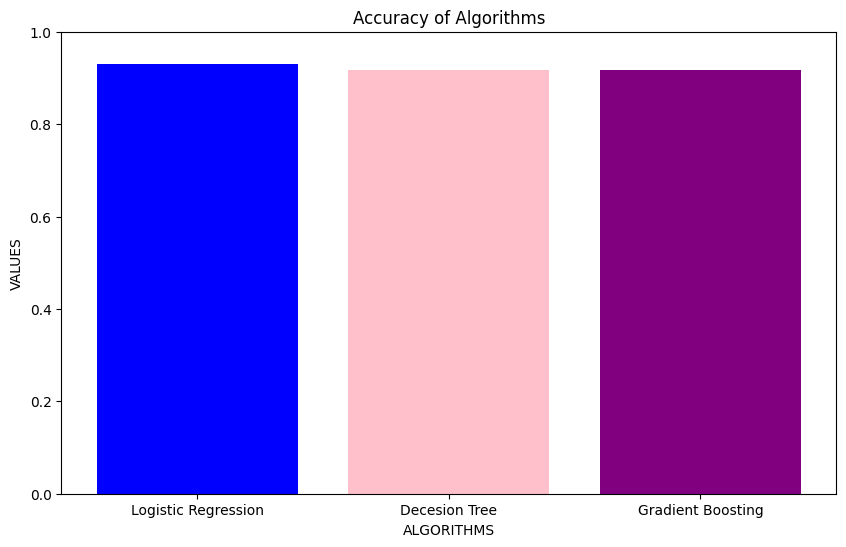

In [ ]:
algo = ['Logistic Regression', 'Decesion Tree', 'Gradient Boosting']
values = [LogREG_testing_Accuracy,DTtesting_Accuracy,GBtesting_Accuracy]
plt.figure(figsize=(10, 6))
plt.bar(algo, values, color=['blue', 'pink', 'purple'])
plt.title('Accuracy of Algorithms')
plt.xlabel('ALGORITHMS')
plt.ylabel('VALUES')
plt.ylim(0, 1)
plt.show()

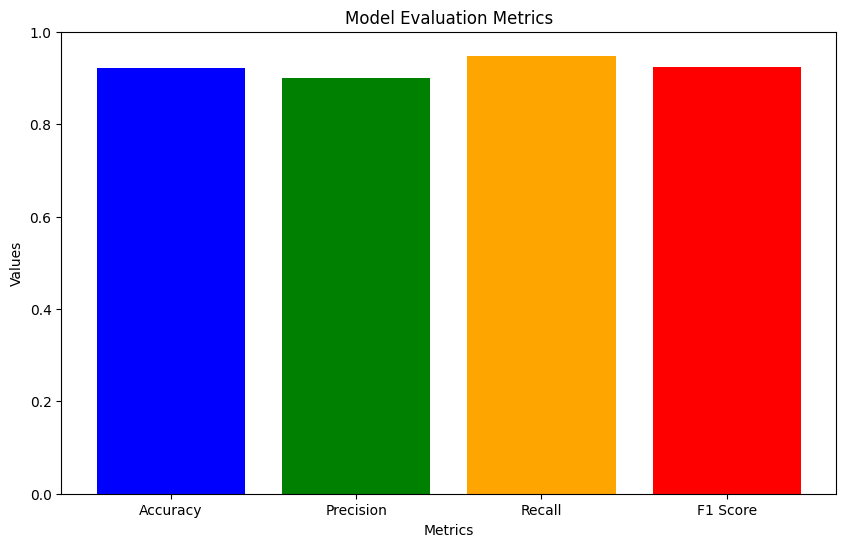

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [overall_accuracy, overall_precesion, overall_recall, overall_f1]
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)
plt.show()